In [1]:
from sympy import *
import itk
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
%matplotlib ipympl

In [2]:
# phi is time, s and theta are space
phi, theta, s, epsilon, k, R = symbols('phi theta s epsilon k R')

In [3]:
x = R * cos(theta) * (1-s*cos(phi)) - epsilon * R * s * cos(phi)
y = R * sin(theta) * (1-s*k*cos(phi))
z = -s * s * ((1+k)/2 + epsilon*cos(theta) + (1-k)/2 * cos(2*theta)) * R * sin(phi)

In [4]:
pos = Matrix([x, y, z])

In [5]:
cross = simplify(pos.diff(s).cross(pos.diff(theta)))
cross

Matrix([
[       R**2*s*(-k*s*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*sin(theta)*cos(phi) - (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(theta))*sin(phi)],
[R**2*s*(s*(epsilon + cos(theta))*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*sin(theta))*sin(phi)],
[                                                                            R**2*(k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*cos(phi)]])

In [6]:
normal = simplify(cross / cross.norm())
normal

Matrix([
[       -R**2*s*(k*s*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k - 1)*cos(2*theta) + 1)*cos(theta))*sin(phi)/sqrt(Abs(R**2*(k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*cos(phi))**2 + Abs(R**2*s*(s*(epsilon + cos(theta))*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k - 1)*cos(2*theta) + 1)*sin(theta))*sin(phi))**2 + Abs(R**2*s*(k*s*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k - 1)*cos(2*theta) + 1)*cos(theta))*sin(phi))**2)],
[R**2*s*(s*(epsilon + cos(theta))*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*sin(theta))*sin(phi)/sqrt(Abs(R**2*(k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*cos(phi))**2 + Abs(R**2*s*(s*(eps

In [7]:
V = pos.diff(phi)
V

Matrix([
[                              R*epsilon*s*sin(phi) + R*s*sin(phi)*cos(theta)],
[                                                   R*k*s*sin(phi)*sin(theta)],
[-R*s**2*(epsilon*cos(theta) + k/2 + (1/2 - k/2)*cos(2*theta) + 1/2)*cos(phi)]])

In [8]:
result = simplify(V.dot(normal))
result

R**3*s**2*(k*(s*(epsilon + cos(theta))*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*sin(theta))*sin(phi)**2*sin(theta) - (epsilon + cos(theta))*(k*s*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(theta))*sin(phi)**2 - (k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(phi)**2/2)/sqrt(Abs(R**2*(k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*cos(phi))**2 + Abs(R**2*s*(s*(epsilon + cos(theta))*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k - 1)*cos(2*theta) + 1)*sin(theta))*sin(phi))**2 + Abs(R**2*s*(k*s*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k - 1)*

In [9]:
theta_val = np.linspace(0, 2*np.pi, 100)
s_val = np.linspace(0, 1, 40)[:,np.newaxis]
epsilon_val = 0.25
k_val = 0.6
forward = np.linspace(0, np.pi/4, 80)
phi_val = np.concatenate((forward[::-1],forward))[:,np.newaxis,np.newaxis]
R_val = 19.5
f = lambdify((phi, theta, s, R, k, epsilon), pos, "numpy")

In [10]:
sp_res = f(phi_val, theta_val, s_val, R_val, k_val, epsilon_val).squeeze()
sp_res.shape

(3, 160, 40, 100)

In [11]:
C = lambdify((phi, theta, s, R, k, epsilon), result, "numpy")

In [12]:
color = C(phi_val, theta_val, s_val, R_val, k_val, epsilon_val)
color.shape

(160, 40, 100)

In [13]:
def color_at_index(i):
    return np.tile(color[i,:,:,np.newaxis], (1, 1, 3)) / color[i].max()

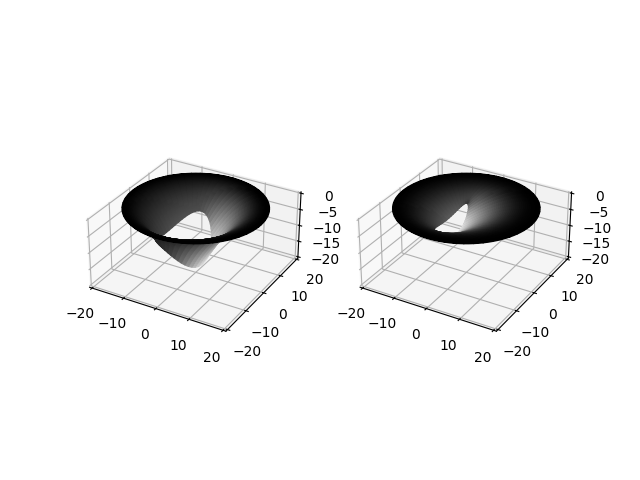

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection = '3d')
ax1.set_xlim3d(-20, 20)
ax1.set_ylim3d(-20, 20)
ax1.set_zlim3d(-20, 0)
ax1.set_aspect('equal')
ax1.plot_surface(*sp_res[:,1], facecolors = color_at_index(1))
ax2 = fig.add_subplot(122, projection = '3d')
ax2.set_xlim3d(-20, 20)
ax2.set_ylim3d(-20, 20)
ax2.set_zlim3d(-20, 0)
ax2.set_aspect('equal')
ax2.plot_surface(*sp_res[:,40], facecolors = color_at_index(40))
plt.show()

In [15]:
vol = np.full((90, 90, 90, 170), 3, dtype=np.uint8)
x = sp_res[0]
y = sp_res[1]
z = sp_res[2]
for t0 in range(2, 158, 1):
    for i in range(-3, 4, 1):
        for j in range(-3, 4, 1):
            for k_ in range(-3, 4, 1):
                for l in range(-3, 4, 1):
                    if (i**2 + j**2 + k_**2 + l**2) < 5:
                        t = t0 + l
                        vol[int(t / 2) + 5, 
                            np.floor(x[t].flatten() * 2 + 44 + i).astype(int), 
                            np.floor(y[t].flatten() * 2 + 44 + j).astype(int), 
                            (np.floor(z[t].flatten() + 47) * 2 + k_).astype(int)] = 0
indices = np.indices(vol.shape)
vol[(np.linalg.norm(indices[1:3] - 44, axis=0) > 40) | (indices[3] < 5) | (indices[3] > 165) | (indices[0] < 6) | (indices[0] >= 84)] = 0
vol[(vol == 3) & (indices[3] < 7)] = 1
vol[(vol == 3) & (indices[3] > 163)] = 2
vol[(np.linalg.norm(indices[1:3] - 44, axis=0) > 38) & (vol != 0)] = 3
vol[(vol != 0) & (indices[0] == 6)] = 4
vol[(vol != 0) & (indices[0] == 83)] = 5

(-68.33333333333334,
 158.33333333333334,
 -68.33333333333334,
 158.33333333333334,
 0.0,
 170.0)

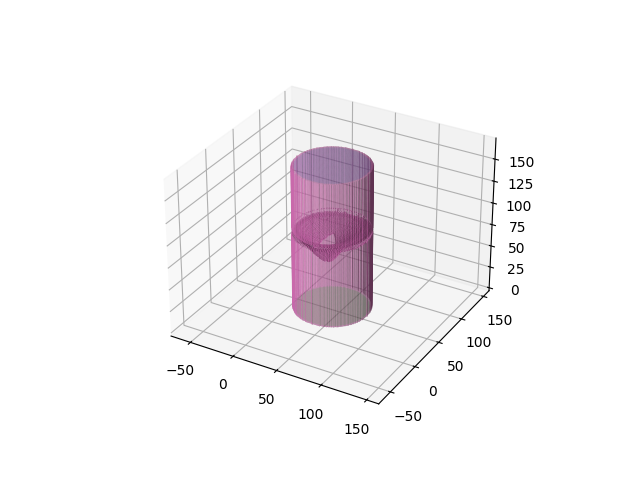

In [18]:
fig2 = plt.figure()
ax = fig2.add_subplot(projection = '3d')
ax.voxels(vol[10],facecolors=plt.cm.tab10(vol[10] / 5),alpha=0.5)
ax.axis('equal')

In [19]:
image = itk.image_from_array(vol.T)
image.SetSpacing([1, 1, 1, 1])
image.GetLargestPossibleRegion().GetSize()

itkSize4 ([170, 90, 90, 90])

In [20]:
itk.imwrite(image, 'data/valve.mha')

In [59]:
x_map = (x * 2 + 44).T.flatten()
y_map = (y * 2 + 44).T.flatten()
z_map = ((z + 47) * 2).T.flatten()
min_time = 0.005280731159408768 / 0.0005
time = np.broadcast_to(np.arange(160) / 2 + 5 - min_time / 2, x.T.shape).flatten()
flat_res = np.stack((z_map, y_map, x_map, time), axis=0).T * 0.0005
tree = KDTree(flat_res)

In [22]:
vel = simplify(result * normal)
vel

Matrix([
[           R**5*s**3*(k*s*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(theta))*(-2*k*(s*(epsilon + cos(theta))*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*sin(theta))*sin(phi)**2*sin(theta) + 2*(epsilon + cos(theta))*(k*s*(epsilon*sin(theta) + (1 - k)*sin(2*theta))*sin(theta)*cos(phi) + (k*s*cos(phi) - 1)*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(theta))*sin(phi)**2 + (k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*(2*epsilon*cos(theta) + k + (1 - k)*cos(2*theta) + 1)*cos(phi)**2)*sin(phi)/(2*(Abs(R**2*(k*(s*cos(phi) - 1)*sin(theta)**2 + (epsilon + cos(theta))*(k*s*cos(phi) - 1)*cos(theta))*cos(phi))**2 + Abs(R**2*s*(s*(epsilon + cos(theta))*(epsilon*sin(theta) - (k - 1)*sin(2*theta))*cos(phi) - (s*cos(phi) - 1)*(2*epsilon*cos(theta) + k - (k

In [23]:
vel_func = lambdify((phi, theta, s, R, k, epsilon), vel, "numpy")

In [24]:
vel_val = vel_func(phi_val, theta_val, s_val, R_val, k_val, epsilon_val).squeeze()
vel_val.shape

(3, 160, 40, 100)

In [76]:
vel_flat = vel_val.T.reshape(-1, 3) / (np.pi / 2) * 90
vel_flat.shape

(640000, 3)

In [61]:
poses = np.fromfile('../out/build/unixlike-gcc-release/src/stmesher/valve.mxyz', dtype='>d').reshape(-1,4)

In [62]:
_, ii = tree.query(poses)

In [77]:
np.concatenate((vel_flat[ii], np.zeros((len(ii),1))), axis=1).reshape(-1).astype('>d').tofile('../out/build/unixlike-gcc-release/src/stmesher/boundary.dat')

In [64]:
flat_res.min(axis=0), flat_res.max(axis=0)

(array([ 0.02976427,  0.00250245,  0.00250982, -0.00014037]),
 array([0.047     , 0.04149755, 0.0415    , 0.03960963]))

In [65]:
poses.min(axis=0), poses.max(axis=0)

(array([0.0025, 0.002 , 0.002 , 0.    ]),
 array([0.083     , 0.0425    , 0.0425    , 0.03921927]))